1. Dataset Selection and Initial Analysis:
Step 1: Choose two datasets from the list provided (Iris, Mall Customers, Wholesale Customers).
Step 2: Conduct an initial exploratory data analysis (EDA) for each dataset to understand its characteristics, including data distribution, feature correlations, and potential outliers.


Mall Customers Dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Missing values:
 CustomerID

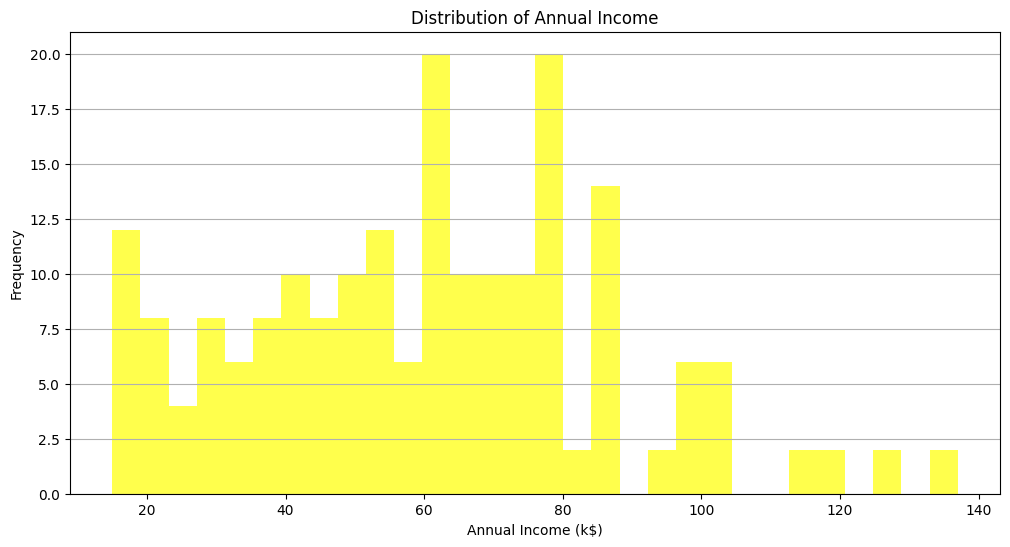

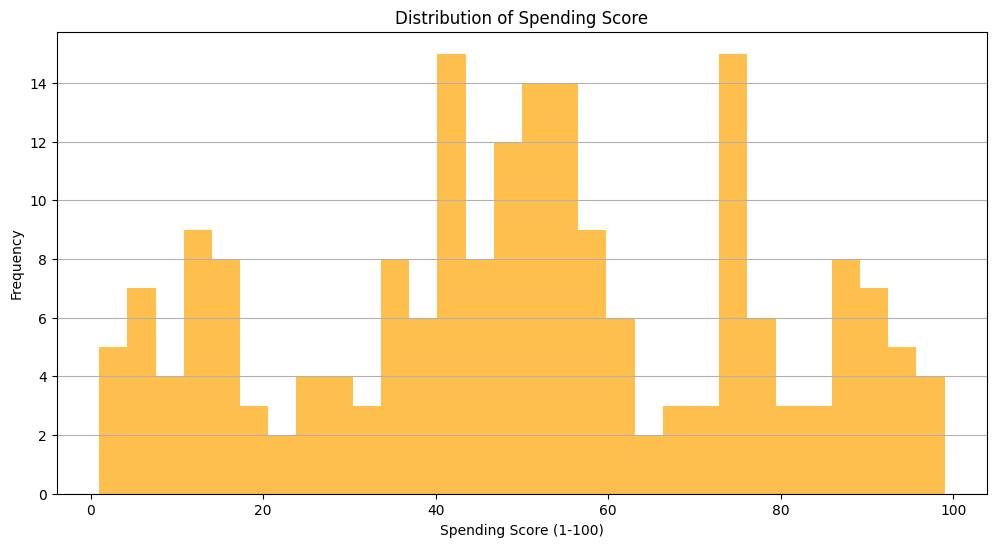

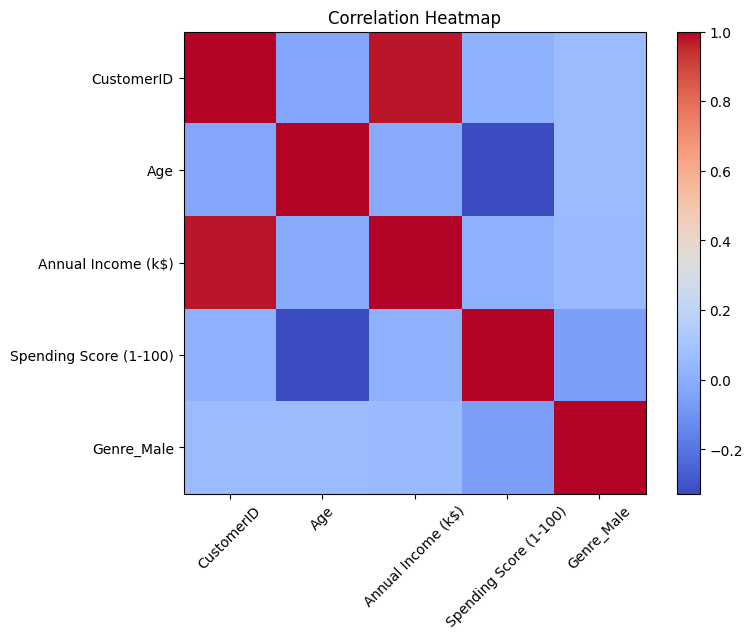

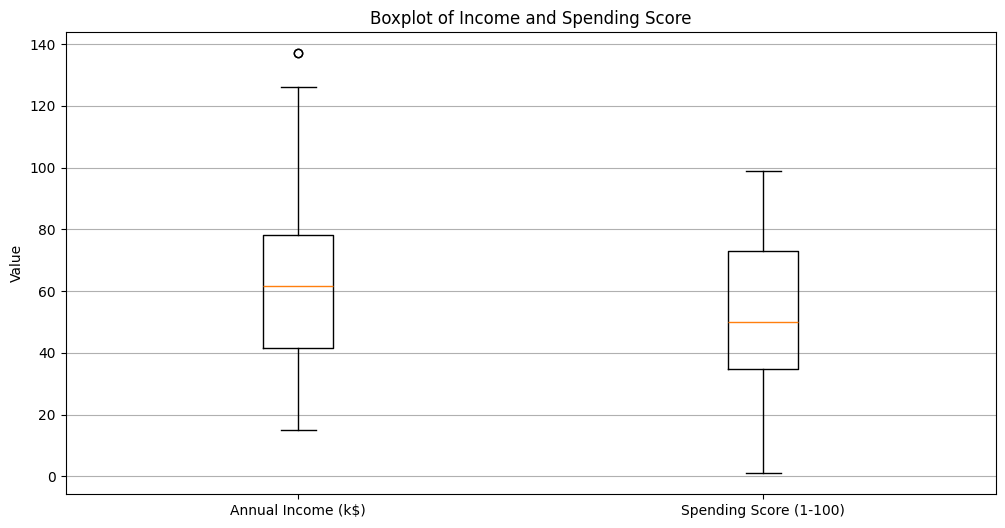

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

mallCustomersdata = pd.read_csv("Mall_Customers.csv")

print("Mall Customers Dataset:")
print(mallCustomersdata.head())
print(mallCustomersdata.info())
print("Missing values:\n", mallCustomersdata.isnull().sum())

mallCustomersdata = pd.get_dummies(mallCustomersdata, columns=['Genre'], drop_first=True)

print("\nDescriptive Statistics:\n", mallCustomersdata.describe())

plt.figure(figsize=(12, 6))
plt.hist(mallCustomersdata['Annual Income (k$)'], bins=30, color='yellow', alpha=0.7)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(mallCustomersdata['Spending Score (1-100)'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

correlation = mallCustomersdata.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([mallCustomersdata['Annual Income (k$)'], mallCustomersdata['Spending Score (1-100)']], 
            labels=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Boxplot of Income and Spending Score')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()


Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 

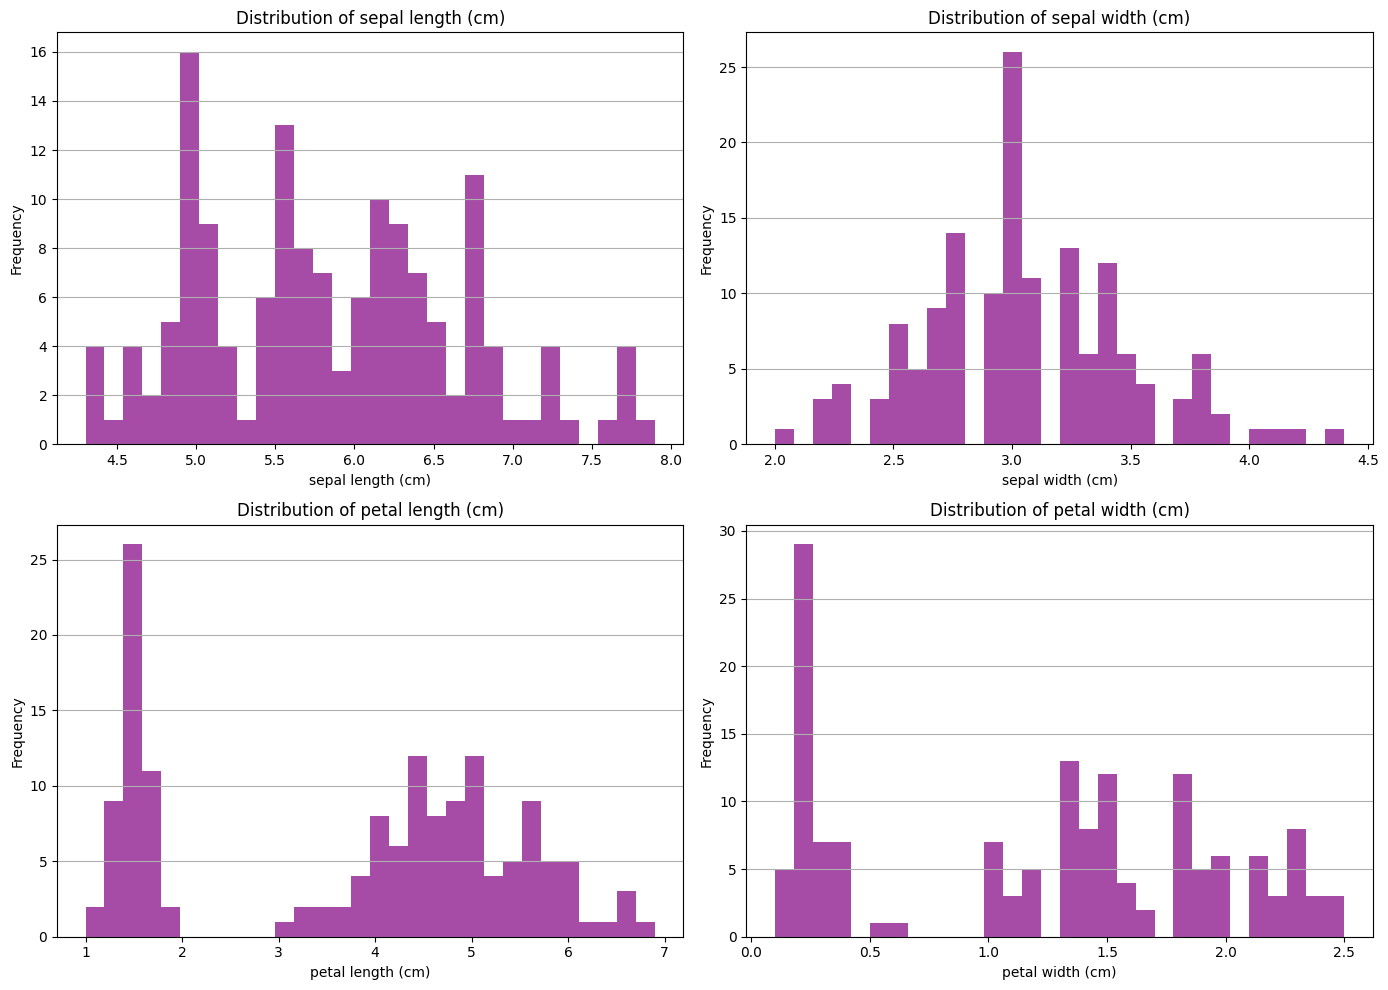

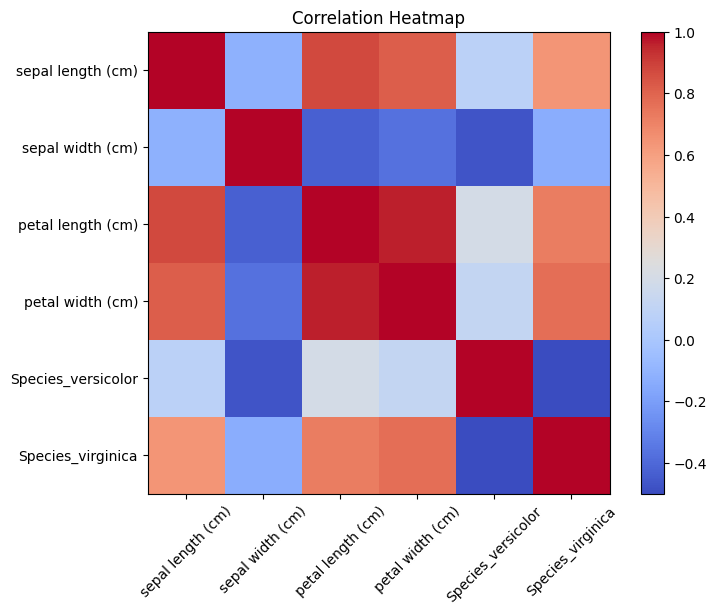

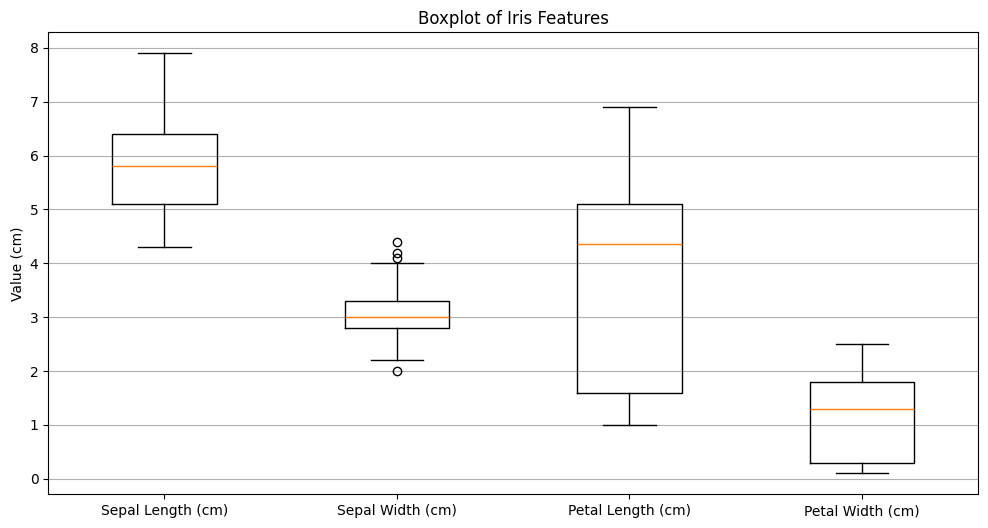

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['Species'] = iris_data.target  

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

print("Iris Dataset:")
print(iris_df.head())
print(iris_df.info())
print("Missing values:\n", iris_df.isnull().sum())

iris_df = pd.get_dummies(iris_df, columns=['Species'], drop_first=True)

print("\nDescriptive Statistics:\n", iris_df.describe())

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    plt.hist(iris_df[feature], bins=30, color='purple', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

correlation = iris_df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()

#Checking for potential outliers
plt.figure(figsize=(12, 6))
plt.boxplot([iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
             iris_df['petal length (cm)'], iris_df['petal width (cm)']], 
            labels=['Sepal Length (cm)', 'Sepal Width (cm)', 
                    'Petal Length (cm)', 'Petal Width (cm)'])
plt.title('Boxplot of Iris Features')
plt.ylabel('Value (cm)')
plt.grid(axis='y')
plt.show()


2. Implementing Clustering Algorithms:
Step 3: Apply K-Means clustering to both datasets. Determine the optimal number of clusters using methods such as the Elbow Method and Silhouette Score.
Step 4: Apply Hierarchical Clustering to both datasets, choosing an appropriate linkage criterion (e.g., single, complete, average) and visualizing the dendrogram to determine the number of clusters.





c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

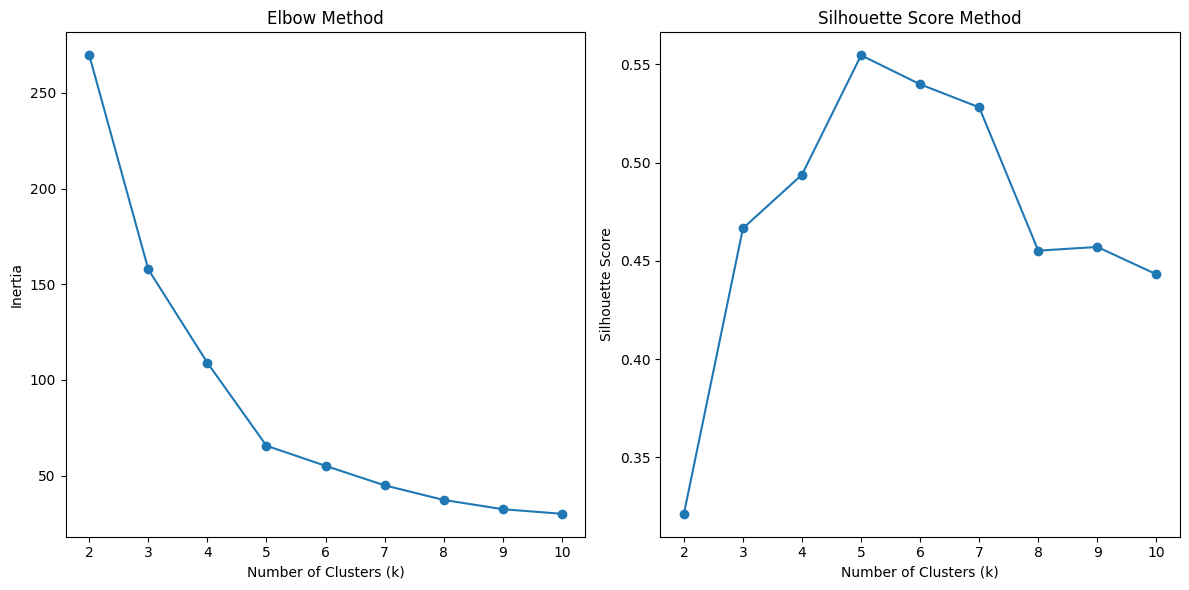

In [5]:
# KMean clustering for Mall Customers Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

mallCustomersdata = pd.read_csv("Mall_Customers.csv")

features = mallCustomersdata[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

inertia = []
silhouetteScores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledFeatures)
    inertia.append(kmeans.inertia_)
    silhouetteScores.append(silhouette_score(scaledFeatures, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouetteScores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

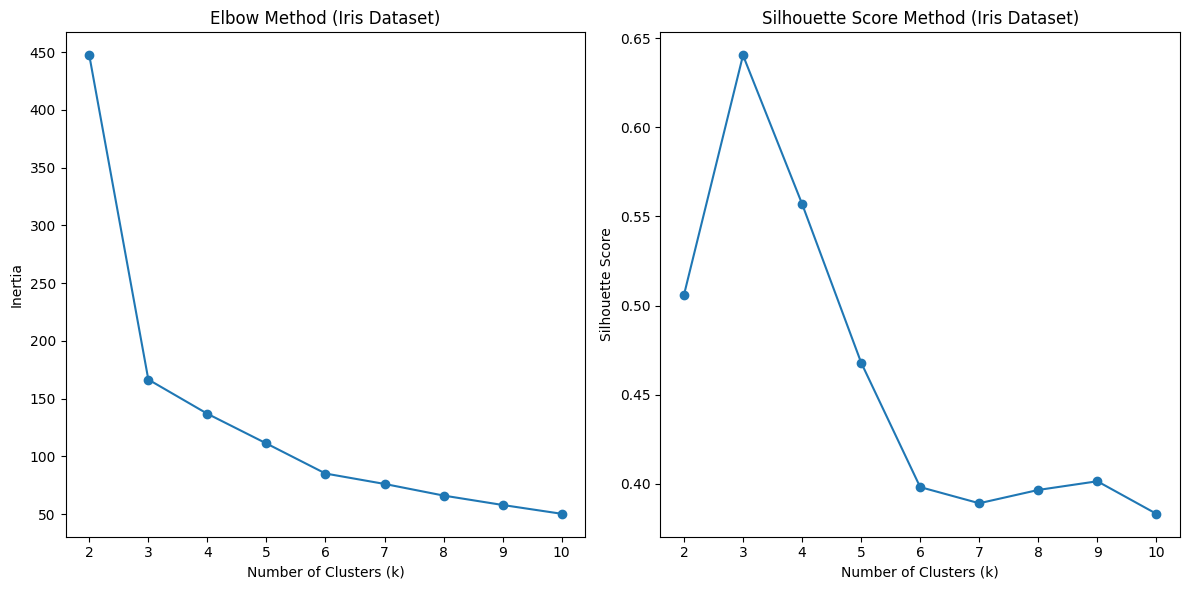

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

irisData = load_iris()
irisDf = pd.DataFrame(data=irisData.data, columns=irisData.feature_names)

scaler = StandardScaler()
scaledData = scaler.fit_transform(iris_df)

K = range(2, 11)

irisInertia = []
silhouetteScores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledData)
    
    irisInertia.append(kmeans.inertia_)
    silhouetteScores.append(silhouette_score(scaledData, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, irisInertia, marker='o')
plt.title('Elbow Method (Iris Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouetteScores, marker='o')
plt.title('Silhouette Score Method (Iris Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


. Cluster Visualization and Interpretation:
Step 5: Visualize the clusters obtained from both K-Means and Hierarchical Clustering. Use dimensionality reduction techniques like PCA or t-SNE to help in visualizing the clusters, if necessary.
Step 6: Compare the clustering results qualitatively (e.g., cluster compactness, separation) and quantitatively (e.g., Silhouette Score, Davies-Bouldin Index).


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


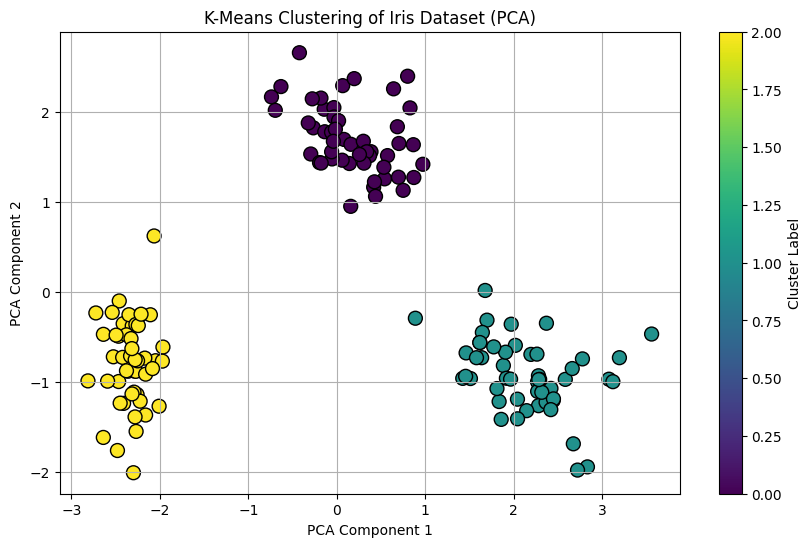

In [8]:
#Visualizing clusters using PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

irisData = load_iris()
irisDf = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

scaler = StandardScaler()
scaledData = scaler.fit_transform(iris_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeansLabels = kmeans.fit_predict(scaledData)

pca = PCA(n_components=2)
irisPca = pca.fit_transform(scaledData)

plt.figure(figsize=(10, 6))
plt.scatter(irisPca[:, 0], irisPca[:, 1], c=kmeansLabels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering of Iris Dataset (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.colorbar(label='Cluster Label')
plt.show()


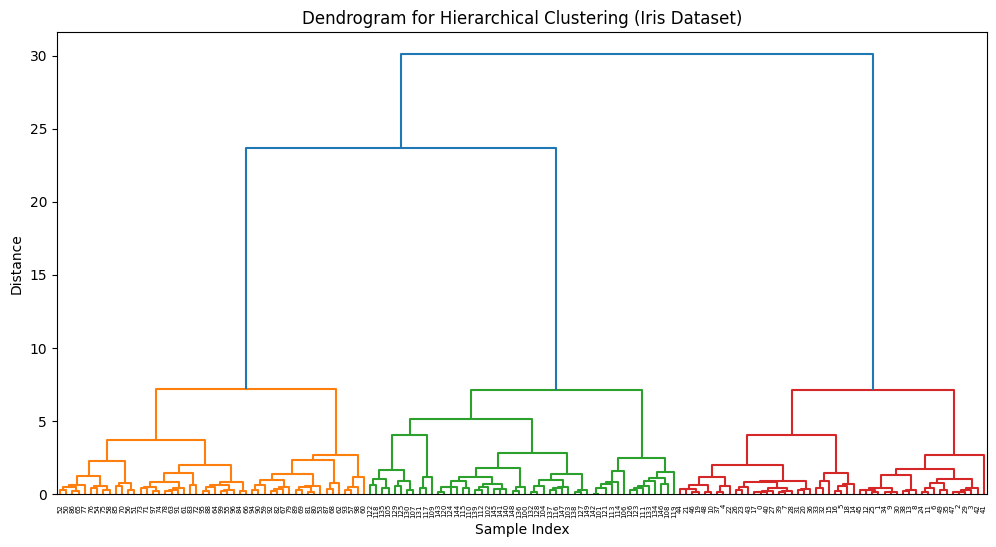

In [9]:
#Hierarical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaledData, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (Iris Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [11]:
#Comparing Cluster Results

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

silhouetteKmeans = silhouette_score(scaledData, kmeansLabels)
daviesBouldinKmeans = davies_bouldin_score(scaledData, kmeansLabels)


hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchicalLabels = hierarchical.fit_predict(scaledData)

silhouetteHierarchical = silhouette_score(scaledData, hierarchicalLabels)
daviesBouldinHierarchical = davies_bouldin_score(scaledData, hierarchicalLabels)

print(f"K-Means Silhouette Score: {silhouetteKmeans:.2f}")
print(f"K-Means Davies-Bouldin Index: {daviesBouldinKmeans:.2f}")
print(f"Hierarchical Silhouette Score: {silhouetteHierarchical:.2f}")
print(f"Hierarchical Davies-Bouldin Index: {daviesBouldinHierarchical:.2f}")


K-Means Silhouette Score: 0.64
K-Means Davies-Bouldin Index: 0.55
Hierarchical Silhouette Score: 0.64
Hierarchical Davies-Bouldin Index: 0.55


Exploratory Analysis and Insights:
Step 7: Analyze the clusters in the context of the original features. For each dataset, interpret the clusters to identify any patterns or insights (e.g., customer segments, species differentiation).



K-Means Cluster Analysis:
                sepal length (cm)  sepal width (cm)  petal length (cm)  \
KMeansCluster                                                           
0                          5.936             2.770              4.260   
1                          6.588             2.974              5.552   
2                          5.006             3.428              1.462   

               petal width (cm)  KMeans_Cluster  Hierarchical_Cluster  \
KMeansCluster                                                           
0                         1.326             0.0                   0.0   
1                         2.026             1.0                   2.0   
2                         0.246             2.0                   1.0   

               HierarchicalCluster  
KMeansCluster                       
0                              0.0  
1                              2.0  
2                              1.0  

Hierarchical Cluster Analysis:
                       s

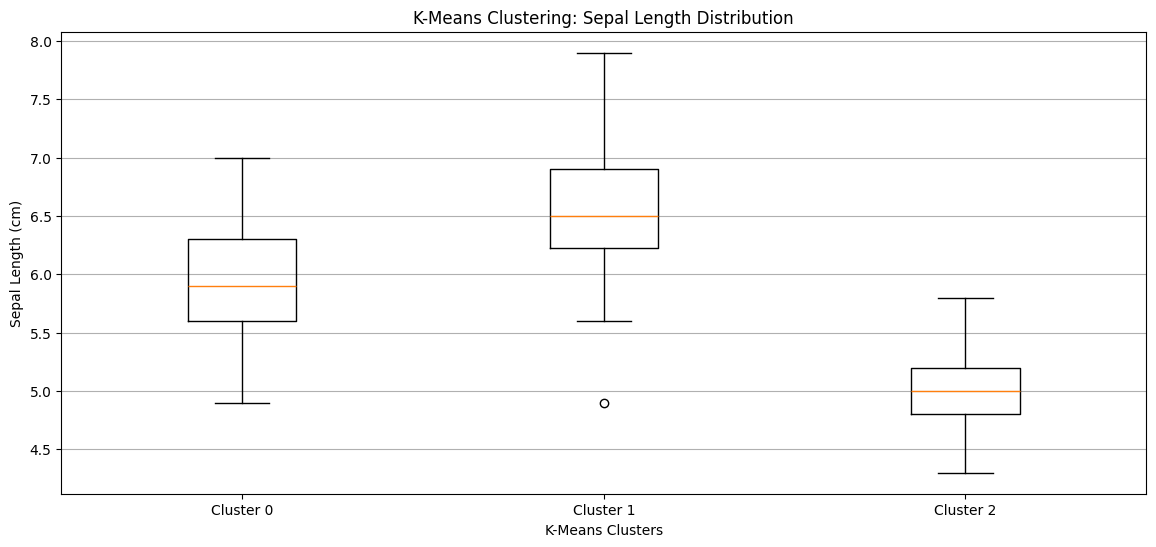

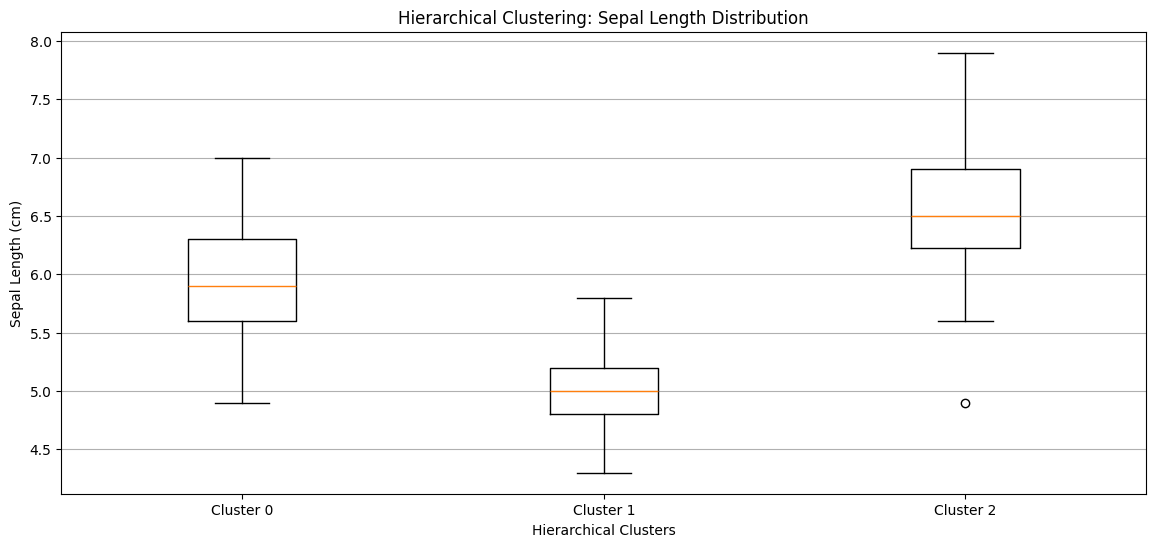

In [21]:
import matplotlib.pyplot as plt

irisDf['KMeans_Cluster'] = kmeansLabels
irisDf['Hierarchical_Cluster'] = hierarchicalLabels

kmeansAnalysis = irisDf.groupby('KMeansCluster').mean()
print("K-Means Cluster Analysis:\n", kmeansAnalysis)

hierarchicalAnalysis = irisDf.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Analysis:\n", hierarchicalAnalysis)

plt.figure(figsize=(14, 6))
plt.boxplot([irisDf[irisDf['KMeans_Cluster'] == i]['sepal length (cm)'] for i in range(kmeansAnalysis.shape[0])],
            labels=[f'Cluster {i}' for i in range(kmeansAnalysis.shape[0])])
plt.title('K-Means Clustering: Sepal Length Distribution')
plt.xlabel('K-Means Clusters')
plt.ylabel('Sepal Length (cm)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(14, 6))
plt.boxplot([irisDf[irisDf['Hierarchical_Cluster'] == i]['sepal length (cm)'] for i in range(hierarchicalAnalysis.shape[0])],
            labels=[f'Cluster {i}' for i in range(hierarchicalAnalysis.shape[0])])
plt.title('Hierarchical Clustering: Sepal Length Distribution')
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Sepal Length (cm)')
plt.grid(axis='y')
plt.show()


 Explore the impact of different clustering parameters (e.g., number of clusters in K-Means, linkage criteria in Hierarchical Clustering) on the results.



c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

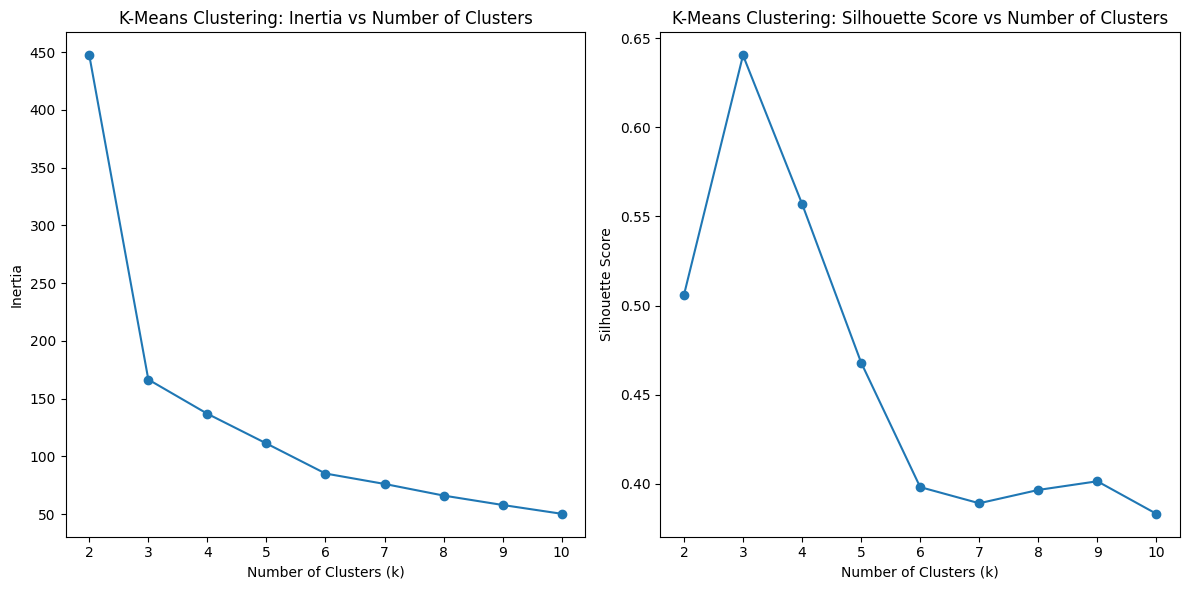

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K = range(2, 11)  
inertia = []
silhouetteScores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledData)
    
    inertia.append(kmeans.inertia_)
    silhouetteScores.append(silhouette_score(scaledData, kmeans.labels_))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('K-Means Clustering: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouetteScores, marker='o')
plt.title('K-Means Clustering: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


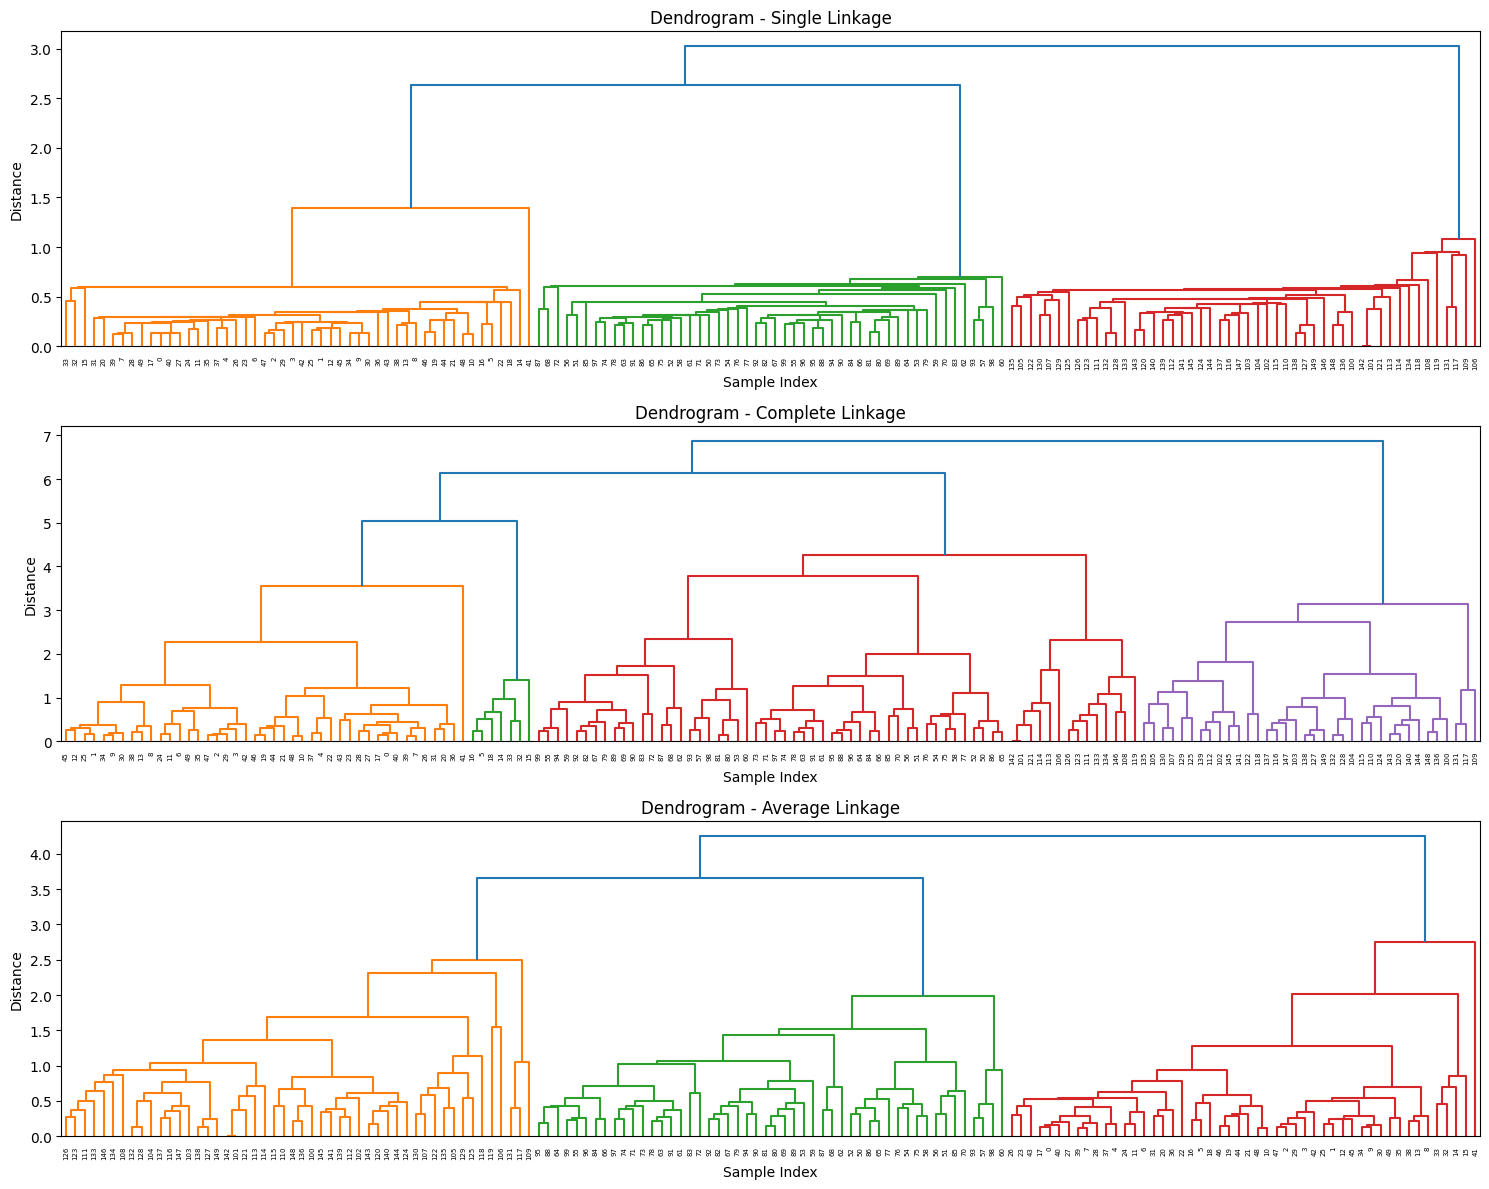

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkageMethods = ['single', 'complete', 'average']

plt.figure(figsize=(15, 12))

for i, method in enumerate(linkageMethods):
    plt.subplot(3, 1, i + 1)
    linked = linkage(scaledData, method=method)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()
